<span style="font-size:x-large;">Lab 4: Mini-Assignment</span>

# Census Lab Assignment

### Declaration

This declaration should be completed and remain attached to the bottom of your submission.

*I am aware of the University’s [policy on academic conduct](https://www.governance.uwa.edu.au/procedures/policies/policies-and-procedures?method=document&id=UP07/21) and I declare that this assignment is my own work entirely and that suitable acknowledgement has been made for any sources of information used in preparing it. I have retained a hard copy for my own records.*

Name: Thomas Cotter

Date: 27/08/2020

---

## Task

Investigate a question of your choosing about a population from the 2016 Census data provided by the Australian Bureau of Statistics (ABS), and present your findings, as discussed in the accompanying assignment sheet.

---

### How has the diversity of languages spoken in Australia changed since 2011?

The aim of my investigation is to analyse the spread of languages in Australia. I will be looking at how the number of people speaking each language in Australia has changed over a decade, as well as comparing the proportion of people speaking each language in Australia. I will also investigate the distribution of languages spoken by sex.

### Sources

I am using the 2011 and 2016 Australian Censuses as my sources of language data.



### Data acquisition

The information I used was titled "Language Spoken at Home by Proficiency in Spoken English/Language by Sex" in the 2016 Census, and "Language Spoken at Home by Sex" in the 2011 Census. 

In [1]:
file_2011 = "2011Census_B13_AUST_short.csv"
file_2016_1 = "2016Census_G13A_AUS.csv"
file_2016_2 = "2016Census_G13B_AUS.csv"
file_2016_3 = "2016Census_G13C_AUS.csv"
file_2016_4 = "2016Census_G13D_AUS.csv"

### Data reading

I read the files into a string, for the 2016 I had to combine the files into one string. Commas had to be added to the end of each 2016 file to ensure it was split into a list properly. It was then turned into a list

In [2]:
string_2011_words = ""
string_2016_words = ""
string_2011_digits = ""
string_2016_digits = ""

with open(file_2011) as read_2011:
    line = read_2011.readline().strip()
    string_2011_words += line
    numbers = read_2011.readline().strip()
    string_2011_digits +=numbers
    
with open(file_2016_1) as read_2016:
    line = read_2016.readline().strip()
    string_2016_words += line+","
    numbers = read_2016.readline()
    string_2016_digits +=numbers+","

with open(file_2016_2) as read_2016:
    line = read_2016.readline().strip()
    string_2016_words += line+","
    numbers = read_2016.readline()
    string_2016_digits +=numbers+","

with open(file_2016_3) as read_2016:
    line = read_2016.readline().strip()
    string_2016_words += line+","
    numbers = read_2016.readline()
    string_2016_digits +=numbers+","

with open(file_2016_4) as read_2016:
    line = read_2016.readline().strip()
    string_2016_words += line+","
    numbers = read_2016.readline()
    string_2016_digits +=numbers+","



In [3]:
list_2011_words = string_2011_words.split(",")
list_2011_digits = string_2011_digits.split(",")
list_2016_words = string_2016_words.split(",")
list_2016_digits = string_2016_digits.split(",")


### Data Cleaning - 2016 data

For the 2016 file, I was only interested in the total number of people that spoke the language at home. I had to remove the "speaks English very well or well", "speaks English not well or not at all", "speaks English total" and "Not stated" files, so I removed them for clarity, as well as the totals for Chinese, Indo-Aryna and South-East Asian Austronesian speaking people.

In [4]:
cleaned_2016_words = []
cleaned_2016_digits =[]

for i in range(len(list_2016_words)):
    if not(list_2016_words[i].count("_Tot")==0 or list_2016_words[i].count("SOLSE")!=0) and list_2016_words[i].count("SEO")==0 and list_2016_words[i].count("_Tot_")==0 or list_2016_words[i].count("SEO_Tot")==1:
        cleaned_2016_words.append(list_2016_words[i][:-4])
        cleaned_2016_digits.append(list_2016_digits[i])

for i in range(len(cleaned_2016_words)):
    #making "English only", "Australian Indigenous Language", "Language at home not stated", and "other Chinese/Indo-Aryan/South-East Asian Austronesian languages" easier to read
    if cleaned_2016_words[i].count("_CL_Oth") == 1:
        cleaned_2016_words[i] = cleaned_2016_words[i].replace("_CL_Oth","_Other Chinese Languages")
    else:
        if cleaned_2016_words[i].count("CL")>0:
            cleaned_2016_words[i]=cleaned_2016_words[i].replace("_CL","")
    if cleaned_2016_words[i].count("_IAL_Oth") == 1:
        cleaned_2016_words[i] = cleaned_2016_words[i].replace("_IAL_Oth","_Other Indo-Aryan Languages")
    else:
        if cleaned_2016_words[i].count("IAL")>0:
            cleaned_2016_words[i]=cleaned_2016_words[i].replace("_IAL","")
    if cleaned_2016_words[i].count("_SAL_Oth") == 1:
        cleaned_2016_words[i] = cleaned_2016_words[i].replace("_SAL_Oth","_Other South-East Asian Austronesian languages")
    else:
        if cleaned_2016_words[i].count("SAL")>0:
            cleaned_2016_words[i]=cleaned_2016_words[i].replace("_SAL","")
    if cleaned_2016_words[i].count("LSatH") ==1:
        cleaned_2016_words[i] = cleaned_2016_words[i].replace("_LSatH_NS","OL_Not stated")
    if cleaned_2016_words[i].count("SEO") ==1:
        cleaned_2016_words[i] = cleaned_2016_words[i].replace("SEO","OL_English")
    cleaned_2016_digits[i] = int(cleaned_2016_digits[i])
    if cleaned_2016_words[i].count("_AIndLng") ==1:
        cleaned_2016_words[i] = cleaned_2016_words[i].replace("_AIndLng","_Australian Indigenous Language")
        

### Data sorting

Data was sorted into individual lists for male, female and total data

In [5]:
female_words_16 = []
male_words_16 = []
total_words_16 = []
female_digits_16 = []
male_digits_16 = []
total_digits_16 = []
for i in range(len(cleaned_2016_words)):
    if cleaned_2016_words[i][0] == "M":
        male_words_16.append(cleaned_2016_words[i][4:])
        male_digits_16.append(cleaned_2016_digits[i])
    else:
        if cleaned_2016_words[i][0] == "F":
            female_words_16.append(cleaned_2016_words[i][4:])
            female_digits_16.append(cleaned_2016_digits[i])
        else:
            total_words_16.append(cleaned_2016_words[i][4:])
            total_digits_16.append(cleaned_2016_digits[i])


print(total_words_16)

['English', 'Afrikaans', 'Arabic', 'Australian Indigenous Language', 'Cantones', 'Mandarin', 'Other Chinese Languages', 'Croatian', 'Dutch', 'French', 'German', 'Greek', 'Bengali', 'Hindi', 'Punjabi', 'Sinhalese', 'Urdu', 'Other Indo-Aryan Languages', 'Italian', 'Japanese', 'Korean', 'Macedonian', 'Maltese', 'Persian_ED', 'Polish', 'Russian', 'Samoan', 'Serbian', 'Filipino', 'Indonesian', 'Tagalog', 'Other South-East Asian Austronesian languages', 'Spanish', 'Tamil', 'Thai', 'Turkish', 'Vietnamese', 'Oth', 'Not stated']


### Data cleaning and sorting - 2011 data

2011 language data did not include English fluency, so I just had to remove language round ups and format

In [6]:
cleaned_2011_words = []
cleaned_2011_digits =[]

for i in range(1, len(list_2011_words)-1):
    if list_2011_words[i].count("_Tot_") !=1:
        cleaned_2011_words.append(list_2011_words[i][list_2011_words[i].index("_")+1:])
        cleaned_2011_digits.append(int(list_2011_digits[i]))

cleaned_2011_words = cleaned_2011_words[:-2]        
cleaned_2011_digits = cleaned_2011_digits[:-2]
    
print (cleaned_2011_words)

['Males', 'Females', 'Persons', 'Arabic_M', 'Arabic_F', 'Arabic_P', 'Assyrian_M', 'Assyrian_F', 'Assyrian_P', 'Aus_Indig_Lang_M', 'Aus_Indig_Lang_F', 'Aus_Indig_Lang_P', 'Chin_lang_Cant_M', 'Chin_lang_Cant_F', 'Chin_lang_Cant_P', 'Chin_lang_Mand_M', 'Chin_lang_Mand_F', 'Chin_lang_Mand_P', 'Chin_lang_Other_M', 'Chin_lang_Other_F', 'Chin_lang_Other_P', 'Croatian_M', 'Croatian_F', 'Croatian_P', 'Dutch_M', 'Dutch_F', 'Dutch_P', 'French_M', 'French_F', 'French_P', 'German_M', 'German_F', 'German_P', 'Greek_M', 'Greek_F', 'Greek_P', 'Hungarian_M', 'Hungarian_F', 'Hungarian_P', 'In_Ar_Lang_Beng_M', 'In_Ar_Lang_Beng_F', 'In_Ar_Lang_Beng_P', 'In_Ar_Lang_Hind_M', 'In_Ar_Lang_Hind_F', 'In_Ar_Lang_Hind_P', 'In_Ar_Lang_Punj_M', 'In_Ar_Lang_Punj_F', 'In_Ar_Lang_Punj_P', 'In_Ar_Lang_Sinh_M', 'In_Ar_Lang_Sinh_F', 'In_Ar_Lang_Sinh_P', 'In_Ar_Lang_Urdu_M', 'In_Ar_Lang_Urdu_F', 'In_Ar_Lang_Urdu_P', 'In_Ar_Lang_Othr_M', 'In_Ar_Lang_Othr_F', 'In_Ar_Lang_Othr_P', 'Ir_Lang_Dari_M', 'Ir_Lang_Dari_F', 'Ir_Lang

In [7]:
female_words_11 = []
male_words_11 = []
total_words_11 = []
female_digits_11 = []
male_digits_11 = []
total_digits_11 = []

i=0
while i<len(cleaned_2011_words):
    male_words_11.append(cleaned_2011_words[i][:-2])
    male_digits_11.append(cleaned_2011_digits[i])
    i+=1
    female_words_11.append(cleaned_2011_words[i][:-2])
    female_digits_11.append(cleaned_2011_digits[i])
    i+=1
    total_words_11.append(cleaned_2011_words[i][:-2])
    total_digits_11.append(cleaned_2011_digits[i])
    i+=1
    
print(total_words_11)

['Perso', 'Arabic', 'Assyrian', 'Aus_Indig_Lang', 'Chin_lang_Cant', 'Chin_lang_Mand', 'Chin_lang_Other', 'Croatian', 'Dutch', 'French', 'German', 'Greek', 'Hungarian', 'In_Ar_Lang_Beng', 'In_Ar_Lang_Hind', 'In_Ar_Lang_Punj', 'In_Ar_Lang_Sinh', 'In_Ar_Lang_Urdu', 'In_Ar_Lang_Othr', 'Ir_Lang_Dari', 'Ir_La_Pe_excl_Da', 'Irani_Lan_Othr', 'Italian', 'Japanese', 'Khmer', 'Korean', 'Macedonian', 'Maltese', 'Polish', 'Portuguese', 'Russian', 'Samoan', 'Serbian', 'Se_As_A_L_Filipino', 'Se_As_A_L_Indon', 'Se_As_A_L_Tagal', 'Se_As_A_L_Othr', 'Spanish', 'Tamil', 'Thai', 'Turkish', 'Vietnamese', 'Other', 'spoken_home_ns']


### Comparing the data fairly
To allow a fair comparison of the data, languages that were not listed in both files had to be moved into the "other" languages data point, the languages moved were
Afrikaans, Assyrian, Hungarian, Dari, other Iranic languages, Khmer, and Portugese

In [8]:
removes = ["Afrikaans","Assyrian","Hungarian","Ir_Lang_Dari","Irani_Lan_Othr","Khmer","Portuguese"]

for i in range(len(total_words_11)):
    if total_words_11[i] in removes:
        female_words_11[i]="holder"
        female_digits_11[-2]+=female_digits_11[i]
        female_digits_11[i] = "holder"
        male_words_11[i]="holder"
        male_digits_11[-2]+=male_digits_11[i]
        male_digits_11[i] = "holder"      
        total_words_11[i]="holder"
        total_digits_11[-2]+=total_digits_11[i]
        total_digits_11[i] = "holder"
        
for i in range(len(total_words_16)):
    if total_words_16[i] in removes:
        female_words_16[i]="holder"
        female_digits_16[-2]+=female_digits_16[i]
        female_digits_16[i] = "holder"
        male_words_16[i]="holder"
        male_digits_16[-2]+=male_digits_16[i]
        male_digits_16[i] = "holder"      
        total_words_16[i]="holder"
        total_digits_16[-2]+=total_digits_16[i]
        total_digits_16[i] = "holder"
        
while total_words_16.count("holder")>0:
    total_words_16.remove("holder")
    total_digits_16.remove("holder")
    female_words_16.remove("holder")
    female_digits_16.remove("holder")
    male_words_16.remove("holder")
    male_digits_16.remove("holder")

while total_words_11.count("holder")>0:
    total_words_11.remove("holder")
    total_digits_11.remove("holder")
    female_words_11.remove("holder")
    female_digits_11.remove("holder")
    male_words_11.remove("holder")
    male_digits_11.remove("holder")
    

### Data ordering

The data had to be ordered, this meant moving the location of Persian (excluding Dari) to the same location in the list.

In [9]:
ordered_female_words_11 = []
ordered_male_words_11 = []
ordered_total_words_11 = []
ordered_female_digits_11 = []
ordered_male_digits_11 = []
ordered_total_digits_11 = []

persian_index = total_words_11.index("Ir_La_Pe_excl_Da")
polish_index = total_words_11.index("Polish")

for i in range(persian_index):
    ordered_female_words_11.append(female_words_11[i])
    ordered_male_words_11.append(male_words_11[i])
    ordered_total_words_11.append(total_words_11[i])
    ordered_female_digits_11.append(female_digits_11[i])
    ordered_male_digits_11.append(male_digits_11[i])
    ordered_total_digits_11.append(total_digits_11[i])

for i in range(persian_index+1,polish_index):
    ordered_female_words_11.append(female_words_11[i])
    ordered_male_words_11.append(male_words_11[i])
    ordered_total_words_11.append(total_words_11[i])
    ordered_female_digits_11.append(female_digits_11[i])
    ordered_male_digits_11.append(male_digits_11[i])
    ordered_total_digits_11.append(total_digits_11[i])
    
ordered_female_words_11.append(female_words_11[persian_index])
ordered_male_words_11.append(male_words_11[persian_index])
ordered_total_words_11.append(total_words_11[persian_index])
ordered_female_digits_11.append(female_digits_11[persian_index])
ordered_male_digits_11.append(male_digits_11[persian_index])
ordered_total_digits_11.append(total_digits_11[persian_index])

for i in range(polish_index,len(total_words_11)):
    ordered_female_words_11.append(female_words_11[i])
    ordered_male_words_11.append(male_words_11[i])
    ordered_total_words_11.append(total_words_11[i])
    ordered_female_digits_11.append(female_digits_11[i])
    ordered_male_digits_11.append(male_digits_11[i])
    ordered_total_digits_11.append(total_digits_11[i])
    
print(ordered_male_words_11,ordered_female_words_11,ordered_total_words_11)
print(male_words_16,female_words_16,total_words_16)

['Mal', 'Arabic', 'Aus_Indig_Lang', 'Chin_lang_Cant', 'Chin_lang_Mand', 'Chin_lang_Other', 'Croatian', 'Dutch', 'French', 'German', 'Greek', 'In_Ar_Lang_Beng', 'In_Ar_Lang_Hind', 'In_Ar_Lang_Punj', 'In_Ar_Lang_Sinh', 'In_Ar_Lang_Urdu', 'In_Ar_Lang_Othr', 'Italian', 'Japanese', 'Korean', 'Macedonian', 'Maltese', 'Ir_La_Pe_excl_Da', 'Polish', 'Russian', 'Samoan', 'Serbian', 'Se_As_A_L_Filipino', 'Se_As_A_L_Indon', 'Se_As_A_L_Tagal', 'Se_As_A_L_Othr', 'Spanish', 'Tamil', 'Thai', 'Turkish', 'Vietnamese', 'Other', 'spoken_home_ns'] ['Femal', 'Arabic', 'Aus_Indig_Lang', 'Chin_lang_Cant', 'Chin_lang_Mand', 'Chin_lang_Other', 'Croatian', 'Dutch', 'French', 'German', 'Greek', 'In_Ar_Lang_Beng', 'In_Ar_Lang_Hind', 'In_Ar_Lang_Punj', 'In_Ar_Lang_Sinh', 'In_Ar_Lang_Urdu', 'In_Ar_Lang_Othr', 'Italian', 'Japanese', 'Korean', 'Macedonian', 'Maltese', 'Ir_La_Pe_excl_Da', 'Polish', 'Russian', 'Samoan', 'Serbian', 'Se_As_A_L_Filipino', 'Se_As_A_L_Indon', 'Se_As_A_L_Tagal', 'Se_As_A_L_Othr', 'Spanish', '

### Plotting

For the data, I used headers from the 2016 data.

### 2016 Language diversity

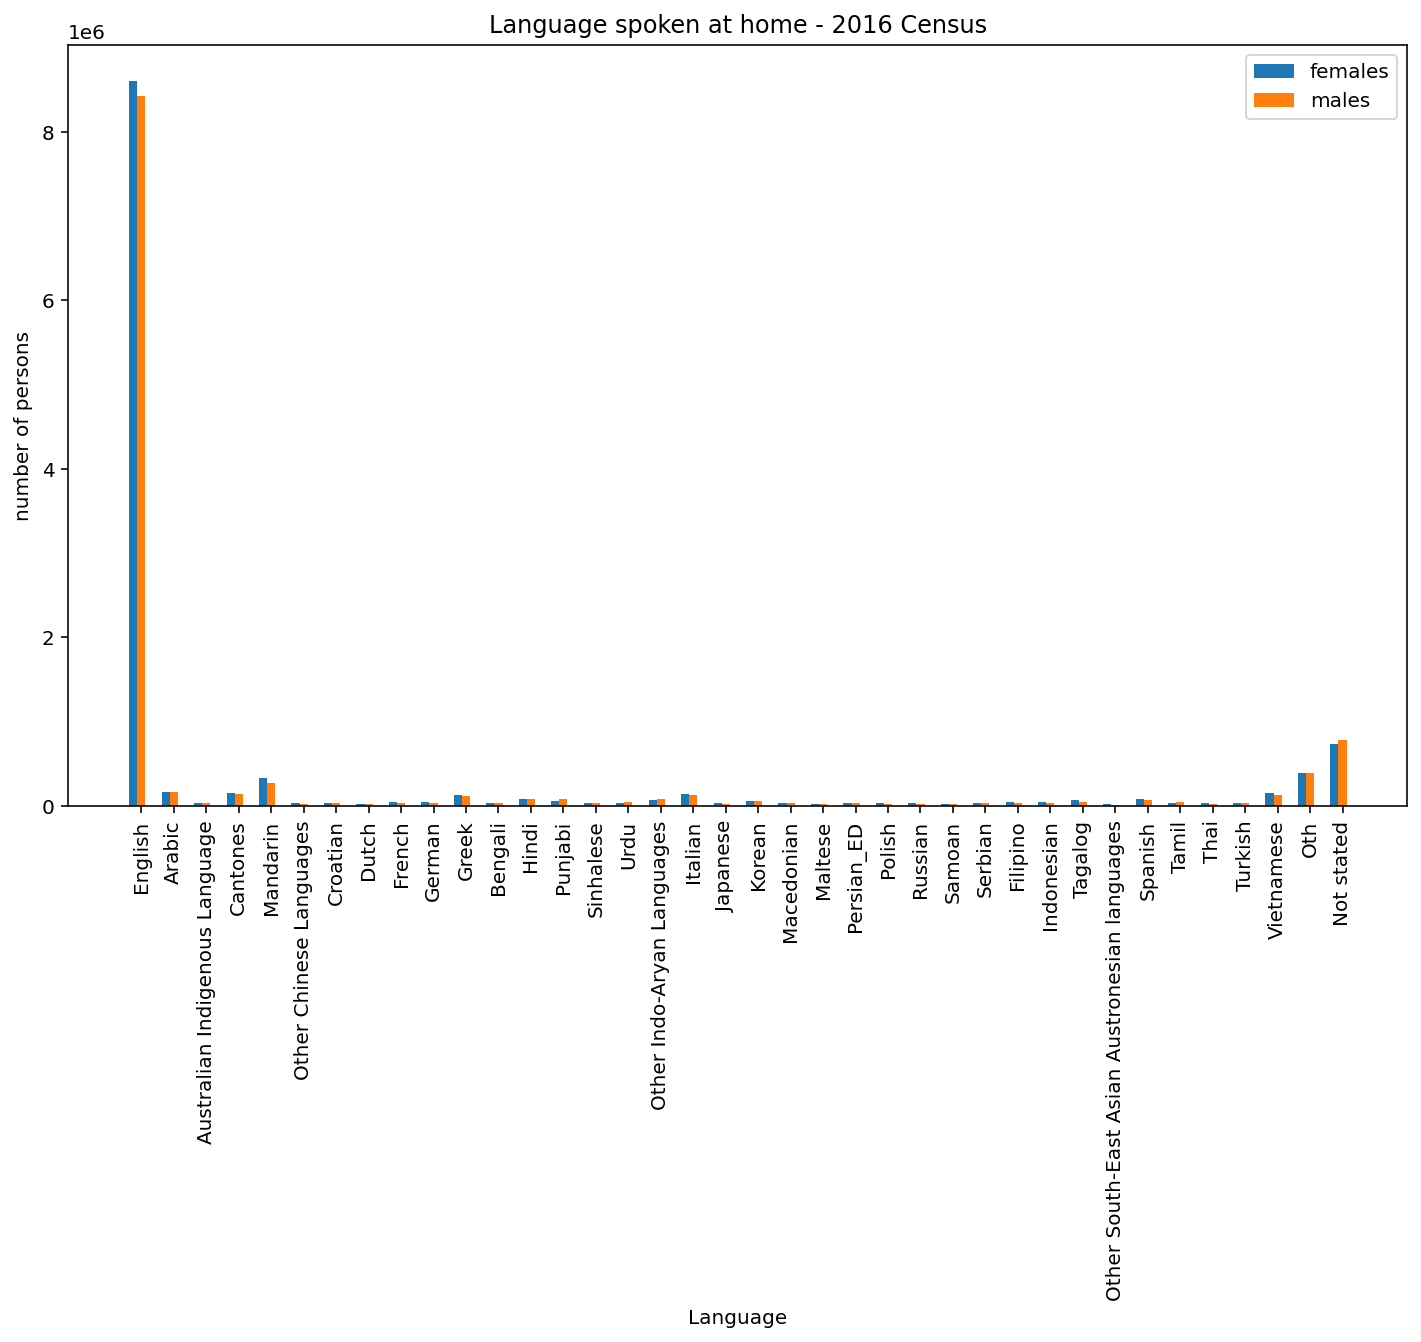

In [10]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(len(total_words_16))

width = 0.25
plt.bar(x,female_digits_16,width)
plt.bar(x+width,male_digits_16,width)
plt.xticks(x+width,total_words_16)
plt.title("Language spoken at home - 2016 Census")
plt.xlabel("Language")
plt.ylabel("number of persons")
plt.legend(["females","males"])
plt.tick_params(axis='x',labelrotation=90)

plt.show()

Clearly we can see that the most commonly spoken language spoken at home is English. According to the census data, 17 million people speak English at home. The second most spoken language (excluding other and not stated) is Mandarin, with less than six hundred thousand people speaking at home. If we exclude the English and not stated data points, we can have a greater understanding of the diversity.

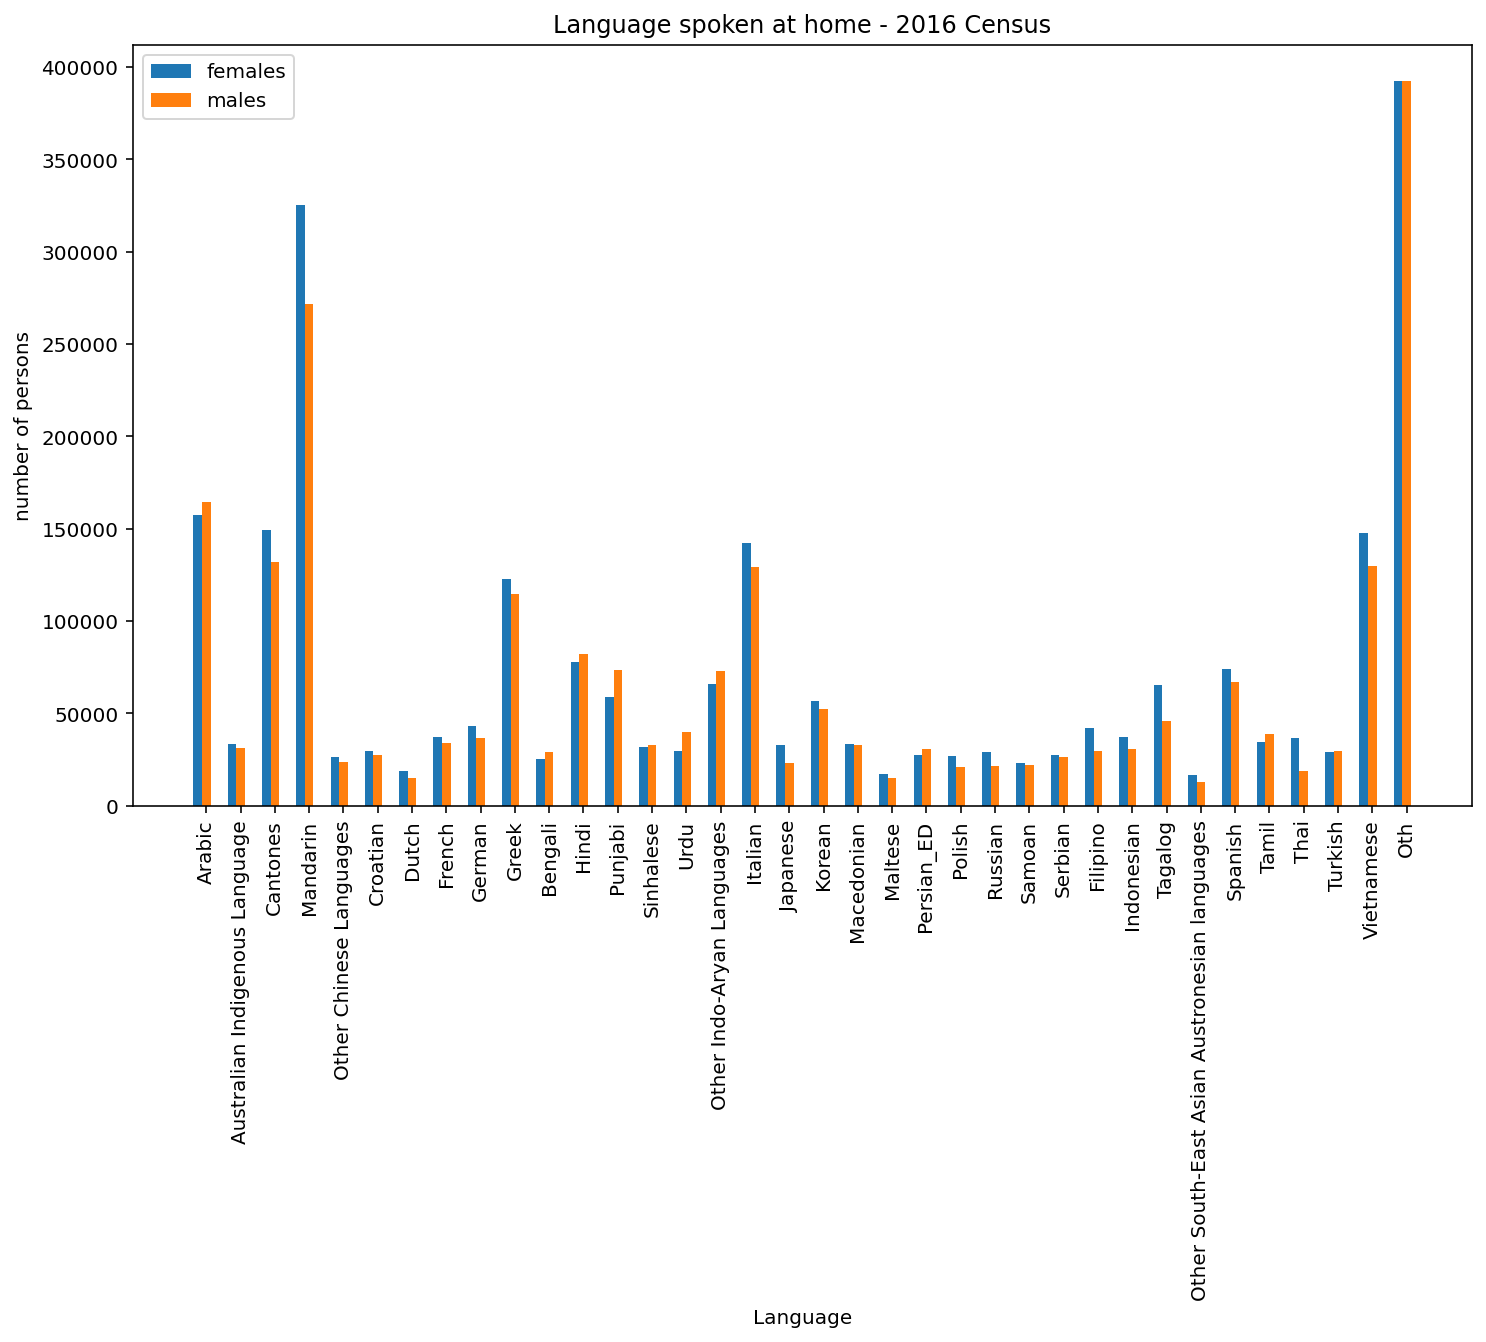

In [11]:
x = np.arange(len(total_words_16)-2)

width = 0.25
plt.bar(x,female_digits_16[1:-1],width)
plt.bar(x+width,male_digits_16[1:-1],width)
plt.xticks(x+width,total_words_16[1:-1])
plt.title("Language spoken at home - 2016 Census")
plt.xlabel("Language")
plt.ylabel("number of persons")
plt.legend(["females","males"])
plt.tick_params(axis='x',labelrotation=90)

plt.show()

Here we can see that (with the exception of other), Mandarin is the most commonly spoken language in Australia for both males and females. It is also notable that Arabic, Indo-Aryan languages, Persian, Tamil and Turkish are the only languages spoken more by males than females.

### Comparing English to other languages


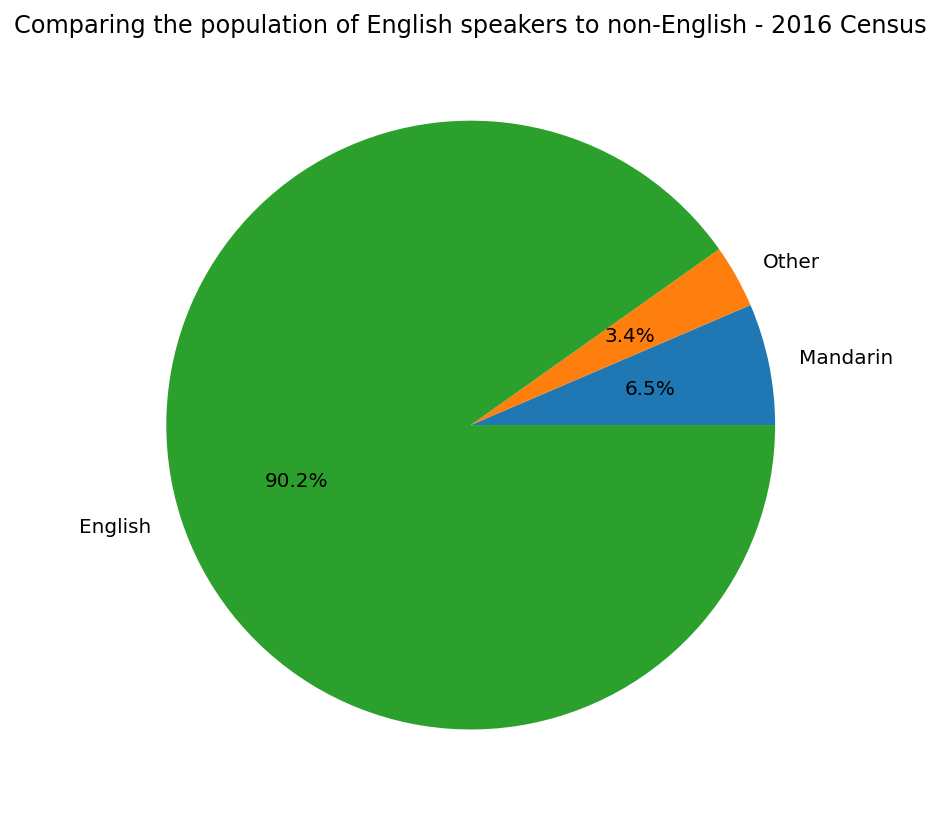

In [12]:
labels = ["Mandarin","Other","English"]
other = 0
for i in range(0,len(total_digits_16)-2):
    other+=total_digits_16[i]
plt.pie([total_digits_16[-1],total_digits_16[-2],other], labels = labels, autopct='%1.1f%%')
plt.title("Comparing the population of English speakers to non-English - 2016 Census")
plt.show()

Here we can see the that a majority of Australians speak English at home, with more than 90% of Australians doing so. By comparison the next most commonly spoken language - Mandarin - is spoken by only 6.5% of people

### Comparing 2011 and 2016 data

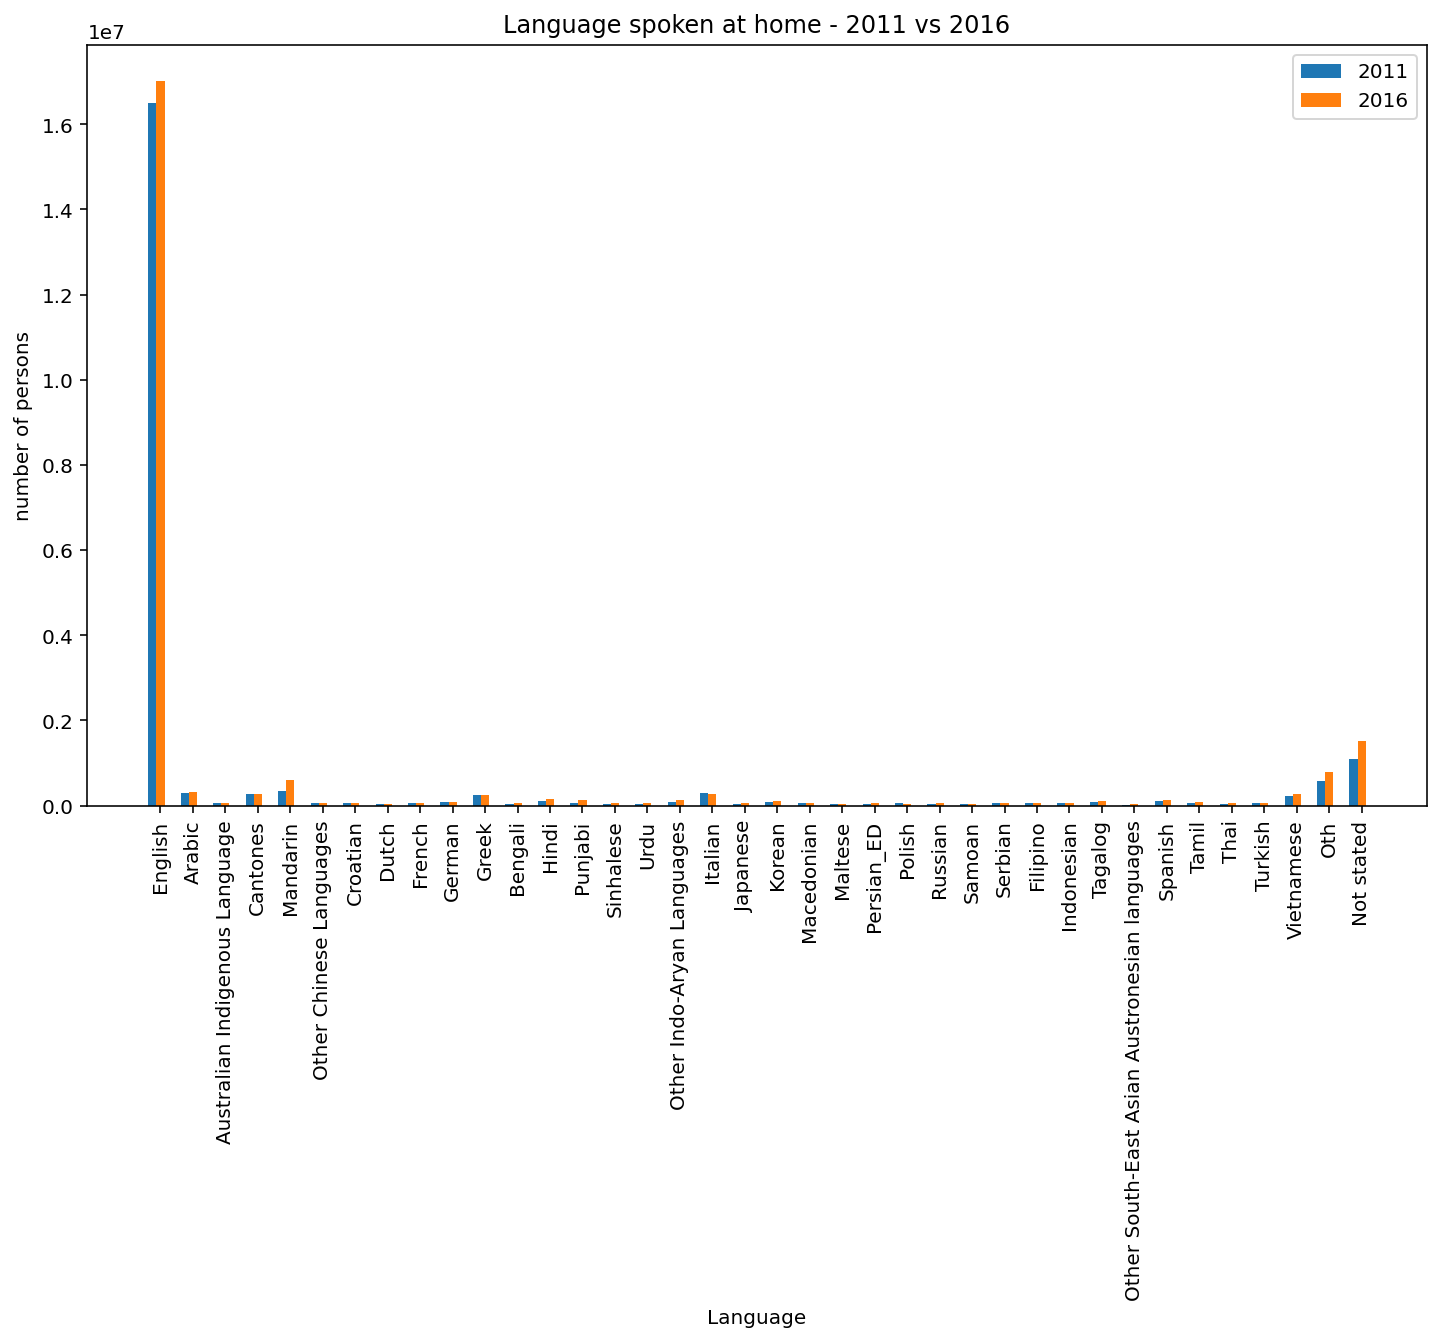

In [13]:
x = np.arange(len(total_words_16))

width = 0.25
plt.bar(x,ordered_total_digits_11,width)
plt.bar(x+width,total_digits_16,width)
plt.xticks(x+width,total_words_16)
plt.title("Language spoken at home - 2011 vs 2016")
plt.xlabel("Language")
plt.ylabel("number of persons")
plt.legend(["2011","2016"])
plt.tick_params(axis='x',labelrotation=90)

plt.show()

Again we will remove English and not stated

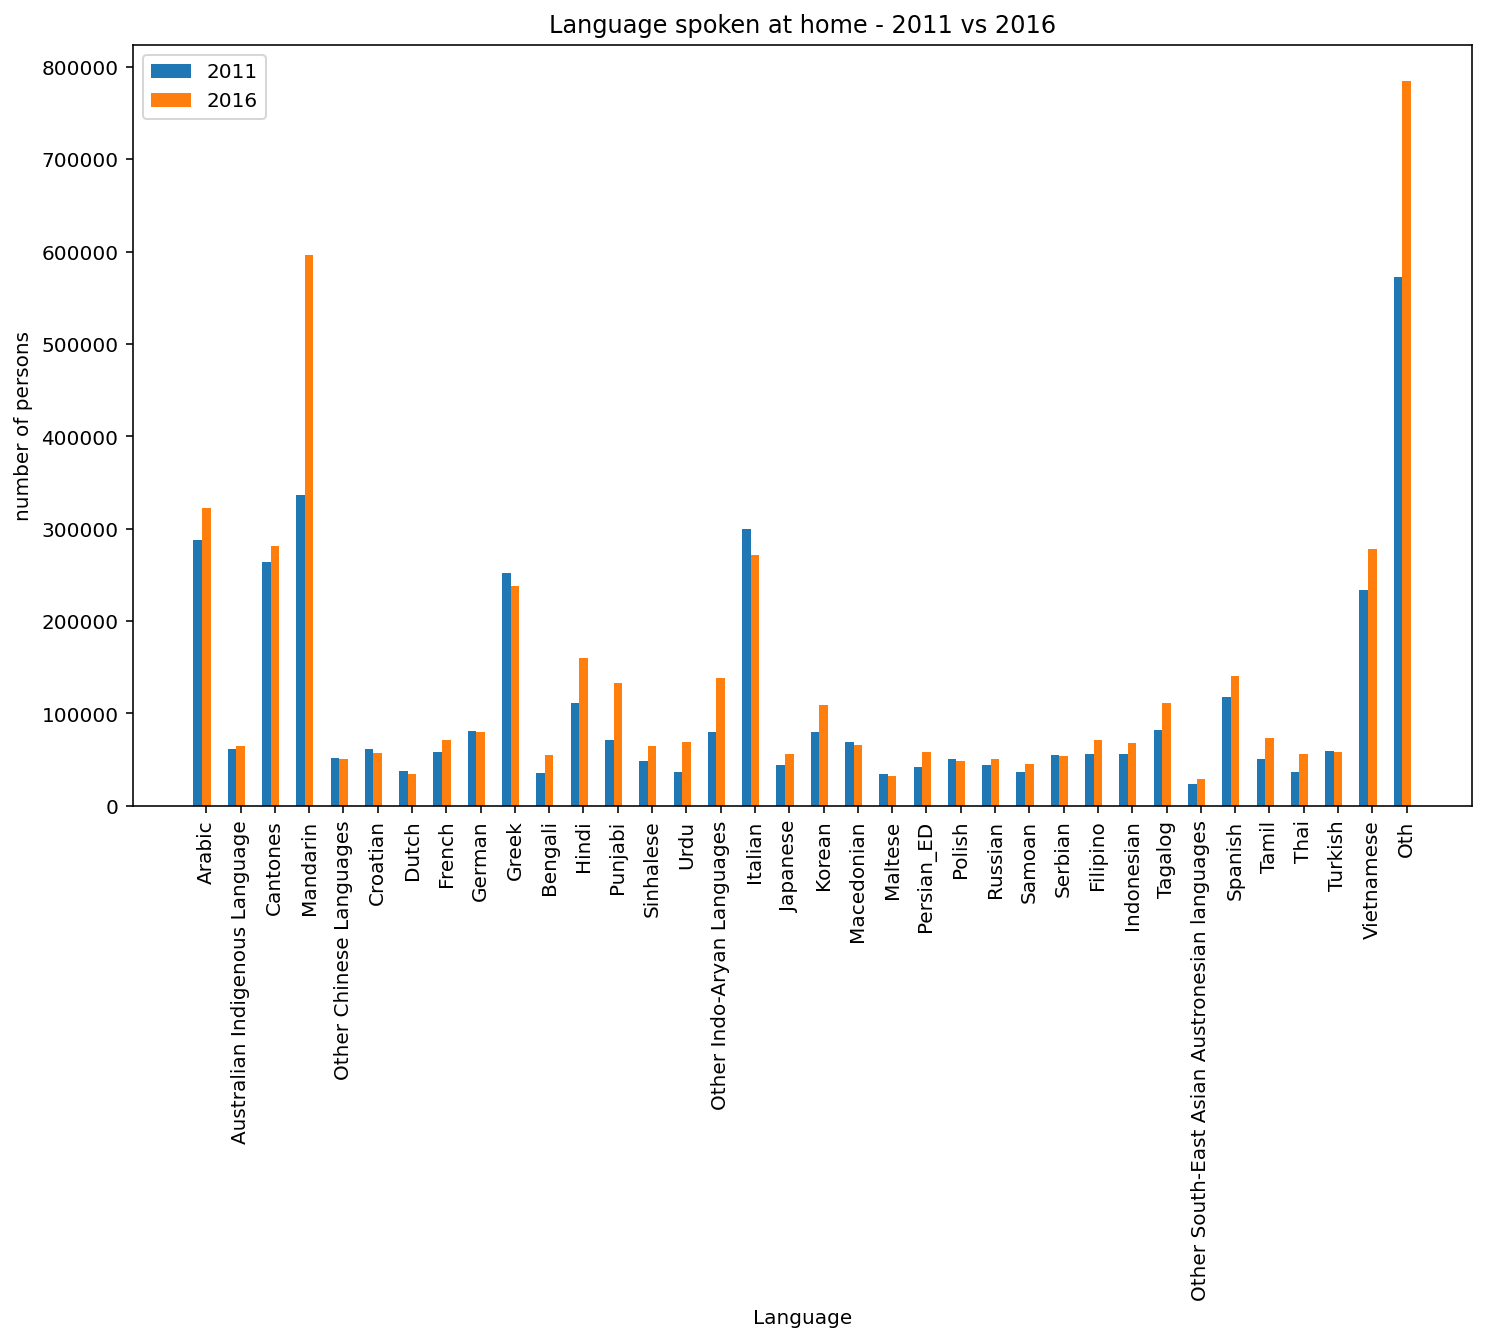

In [14]:
x = np.arange(len(total_words_16)-2)

width = 0.25
plt.bar(x,ordered_total_digits_11[1:-1],width)
plt.bar(x+width,total_digits_16[1:-1],width)
plt.xticks(x+width,total_words_16[1:-1])
plt.title("Language spoken at home - 2011 vs 2016")
plt.xlabel("Language")
plt.ylabel("number of persons")
plt.legend(["2011","2016"])
plt.tick_params(axis='x',labelrotation=90)

plt.show()

We can see that out of all languages (excluding English), Mandarin has had the greatest increase in speakers from 2011 to 2016. This can be made clearer if we graph the difference in number of speakers across the 5 year period

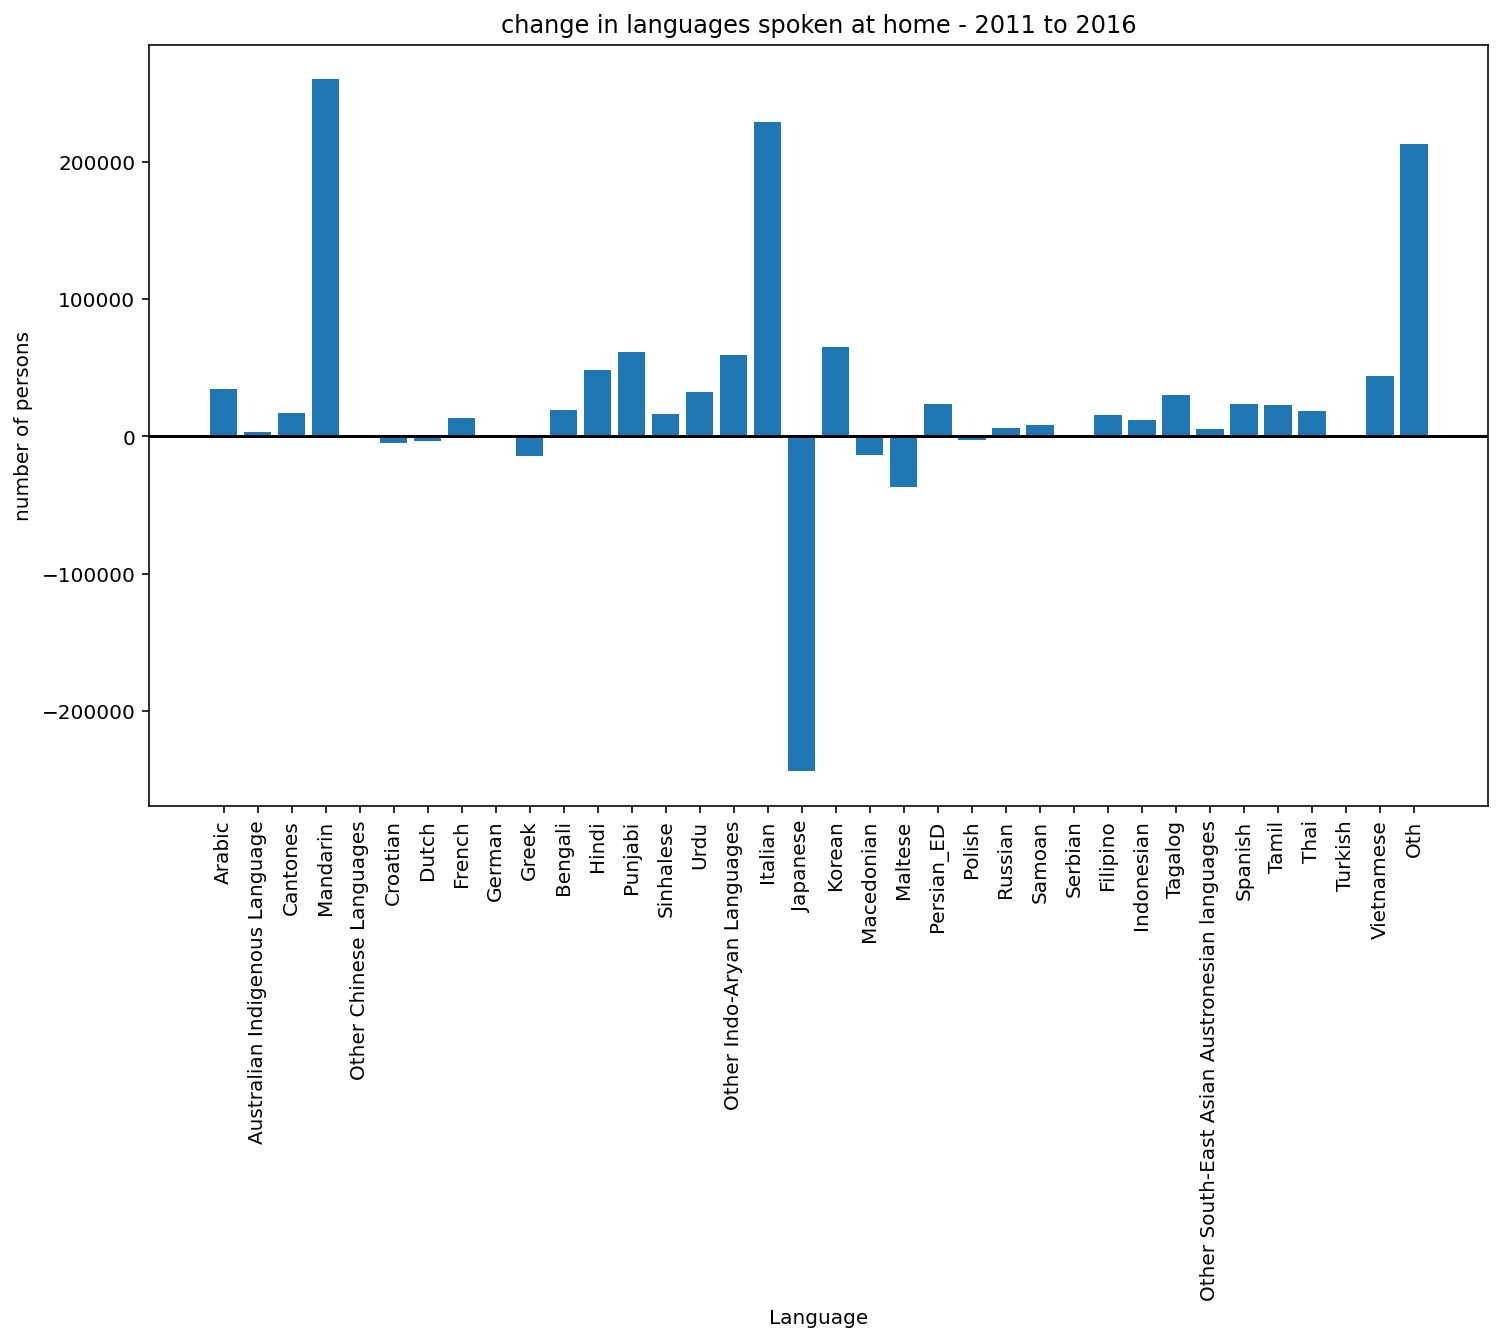

In [15]:
data_16 = np.asarray(total_digits_16)
data_11 = np.asarray(total_digits_11)
diff = data_16-data_11

x = np.arange(len(total_digits_16)-2)
plt.bar(x,diff[1:-1])
plt.xticks(x,total_words_16[1:-1])
plt.title("change in languages spoken at home - 2011 to 2016")
plt.xlabel("Language")
plt.ylabel("number of persons")
plt.tick_params(axis='x',labelrotation=90)
plt.axhline(0,color = "black")
plt.show()


Here we can see that Mandarin, and other Indo-Aryan Languages were the largest increasing spoken languages, while Japanese had the greatest decrease

### Conclusion 

From this investigation it can be concluded that over the period from 2016 to 2011, there was an increase in Mandarin and Indo-Aryan speaking people, while there was a large decrease in Japanese speakers. For all but five non-English languages, more females spoke the language at home than males. It also showed that far more people spoke English than any other language.

### References
Australian Bureau of Statistics (2011). Census of Population and Housing, Basic Community Profile. Table B13: Language Spoken at Home by Sex. Retrieved from https://datapacks.censusdata.abs.gov.au/datapacks/?fbclid=IwAR0E3uGm30B-pkg-Tn8RpIir0OZ6I-PU33dIfgqPjEQ_bPyml0gKlkmbt0Y

Australian Bureau of Statistics (2016). Census of Population and Housing, General Community Profile. Table B13: Language Spoken at Home by Proficiency in Spoken English/Language by Sex. Retrieved from https://datapacks.censusdata.abs.gov.au/datapacks/?fbclid=IwAR0E3uGm30B-pkg-Tn8RpIir0OZ6I-PU33dIfgqPjEQ_bPyml0gKlkmbt0Y